In [26]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# DISTRIBUTION PLOT

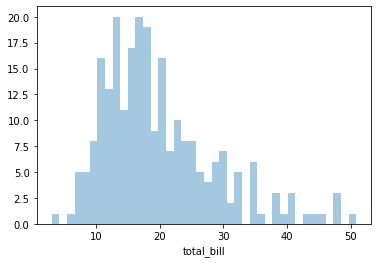

In [10]:
sns.distplot(tips['total_bill'],kde=False,bins = 40)
#kde kernal destiny estimation

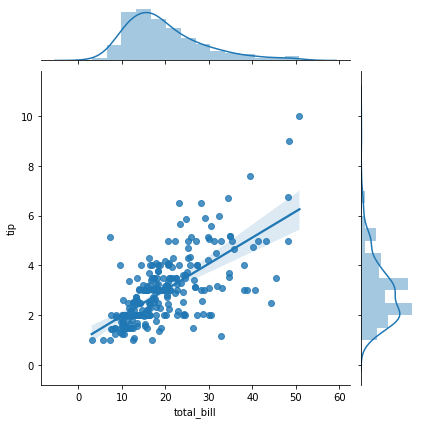

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind= 'reg')

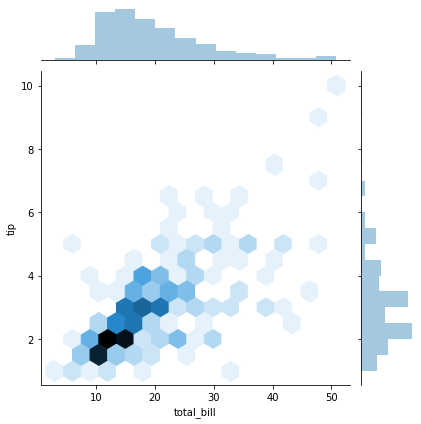

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind= 'hex')

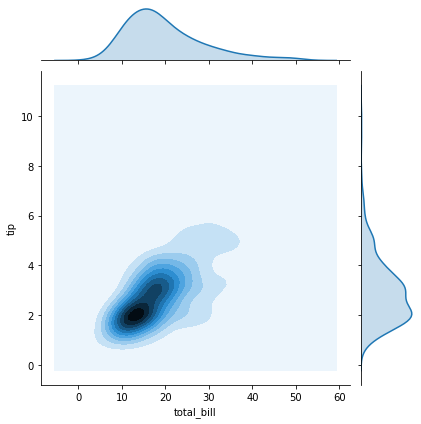

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind= 'kde')

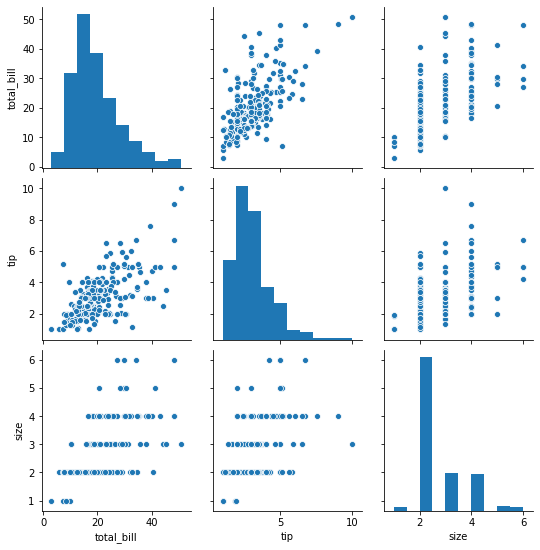

In [18]:
sns.pairplot(tips)

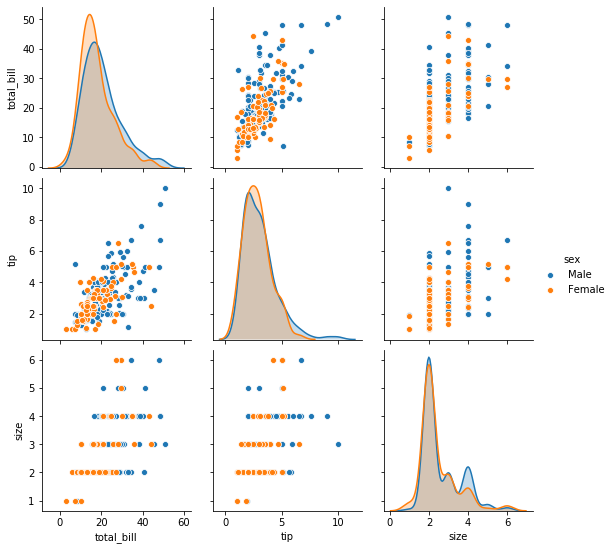

In [19]:
sns.pairplot(tips,hue = 'sex')

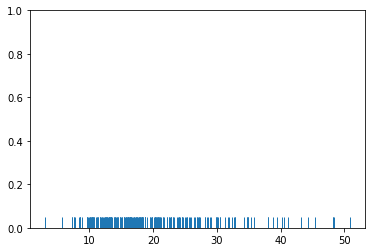

In [20]:
sns.rugplot(tips['total_bill'])

(0, 1)

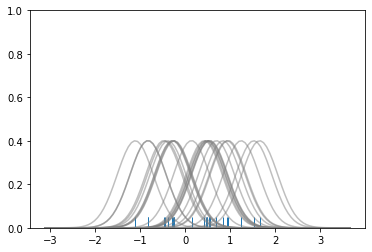

In [21]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

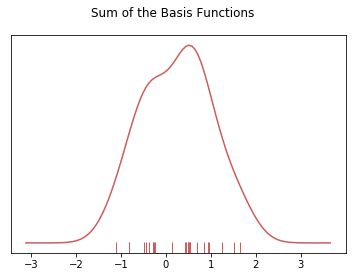

In [22]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

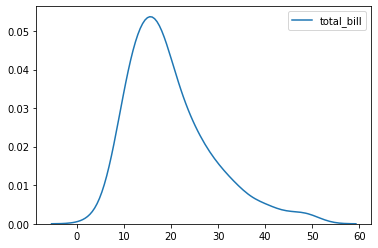

In [23]:
sns.kdeplot(tips['total_bill'])

# <strong>CATEGORICAL PLOT</strong>

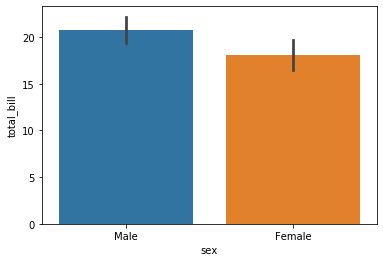

In [25]:
sns.barplot(x='sex',y='total_bill',data=tips)

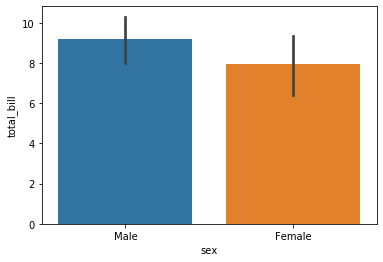

In [27]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

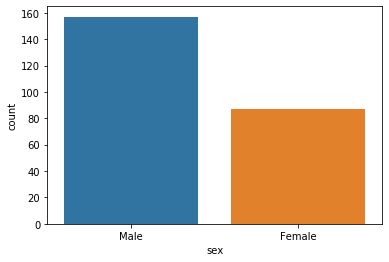

In [28]:
sns.countplot(x='sex',data=tips)

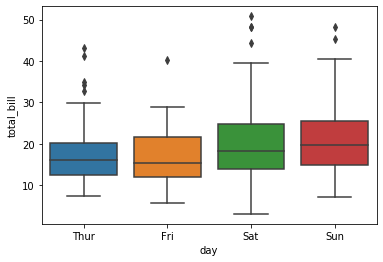

In [31]:
sns.boxplot(x='day',y='total_bill',data=tips)

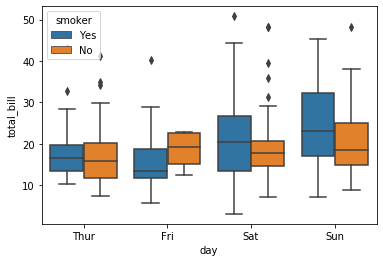

In [30]:
sns.boxplot(x='day',y='total_bill',data=tips,hue= 'smoker')

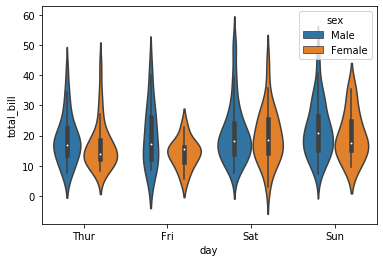

In [33]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

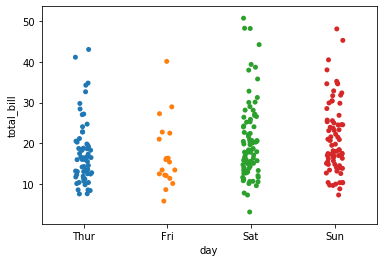

In [34]:
sns.stripplot(x='day',y='total_bill',data= tips)

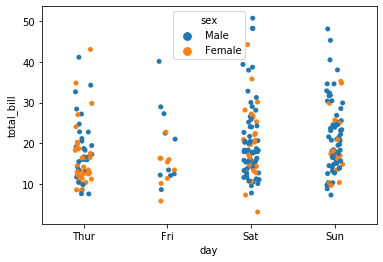

In [35]:
sns.stripplot(x='day',y='total_bill',data= tips,hue='sex')

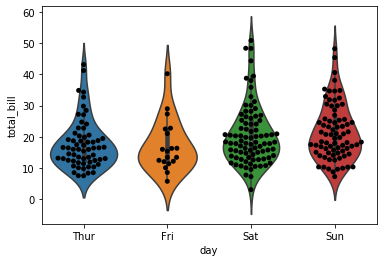

In [37]:
sns.violinplot(x= 'day',y= 'total_bill',data=tips)
sns.swarmplot(x= 'day',y= 'total_bill', data = tips,color='black')

/home/mibontu/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


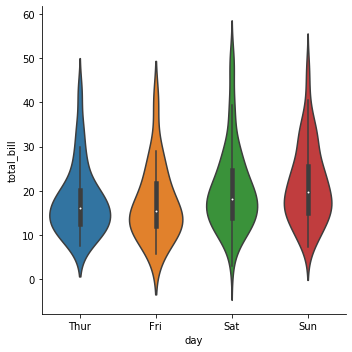

In [40]:
sns.factorplot(x= 'day',y= 'total_bill', data = tips,kind = 'violin')

# <strong>matrix plot</strong>

In [41]:
flights = sns.load_dataset('flights')

In [42]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [44]:
tc= tips.corr()

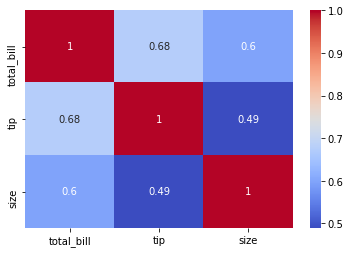

In [48]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [51]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

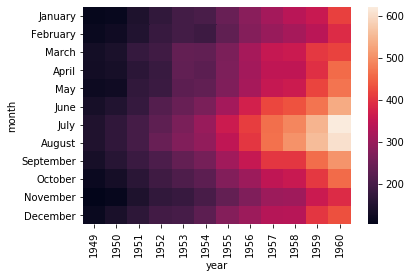

In [52]:
sns.heatmap(fp)

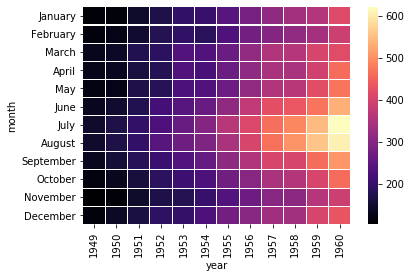

In [55]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=.1)

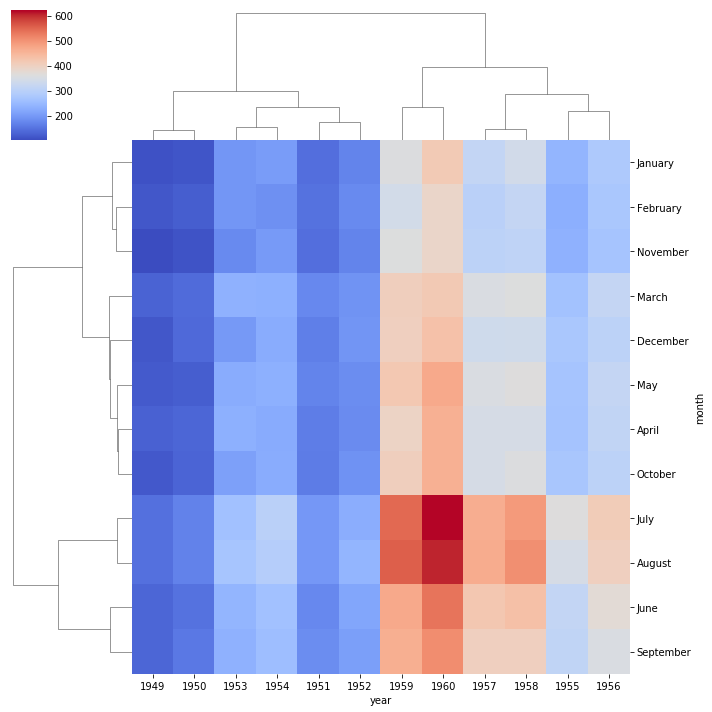

In [57]:
sns.clustermap(fp,cmap='coolwarm')

# <strong>regression plot</strong>

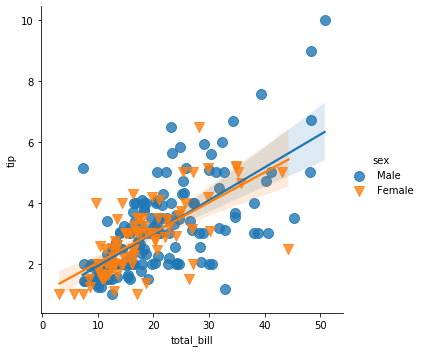

In [62]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':100})

/home/mibontu/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


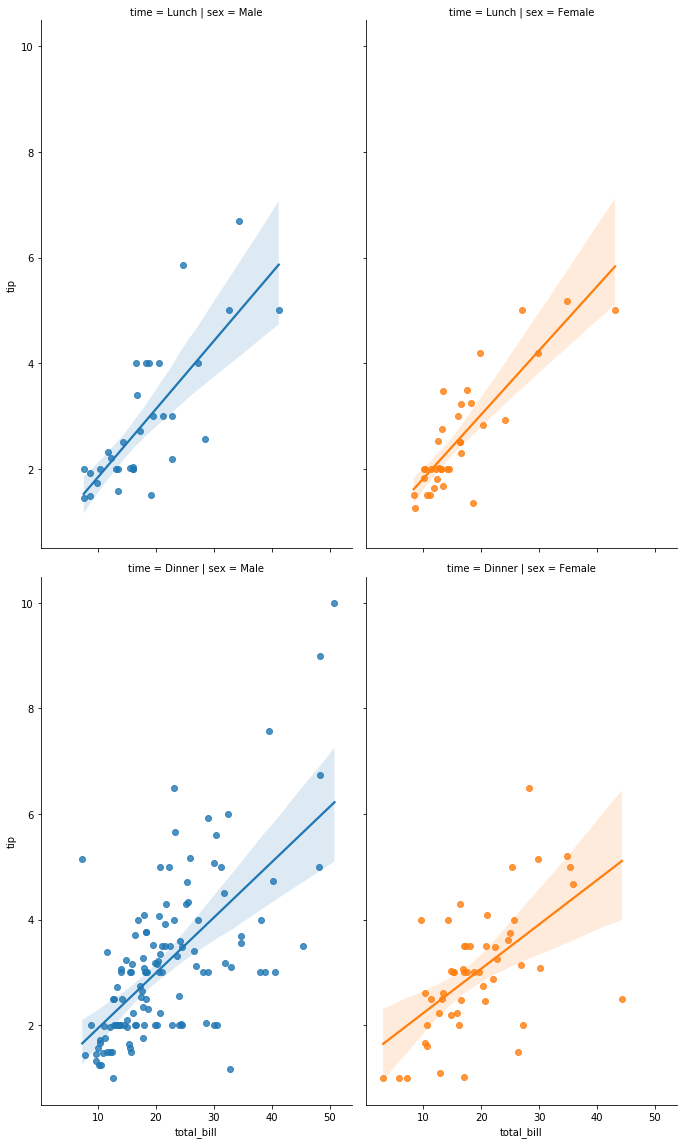

In [67]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row = 'time',hue = 'sex',aspect=0.6,size=8)

# <strong>grids</strong>

In [68]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

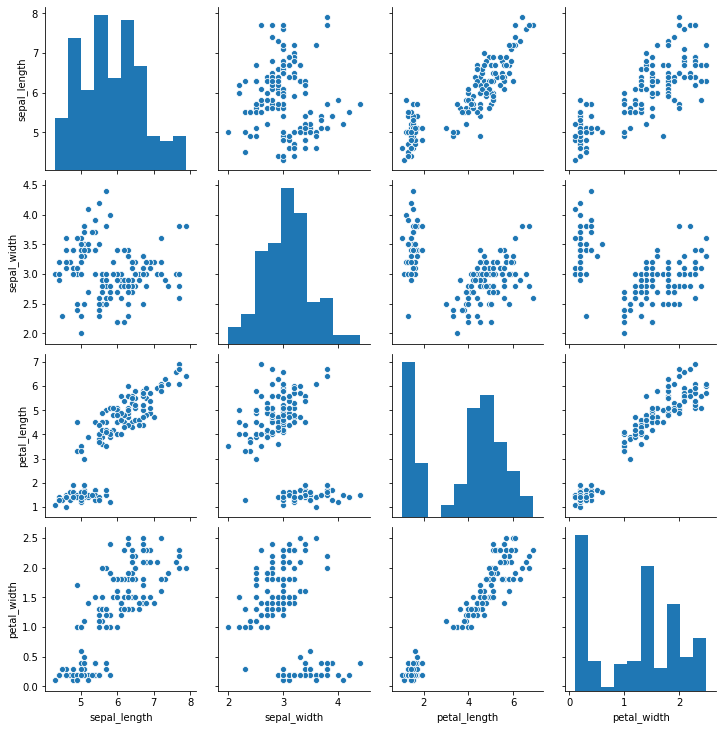

In [71]:
sns.pairplot(iris)

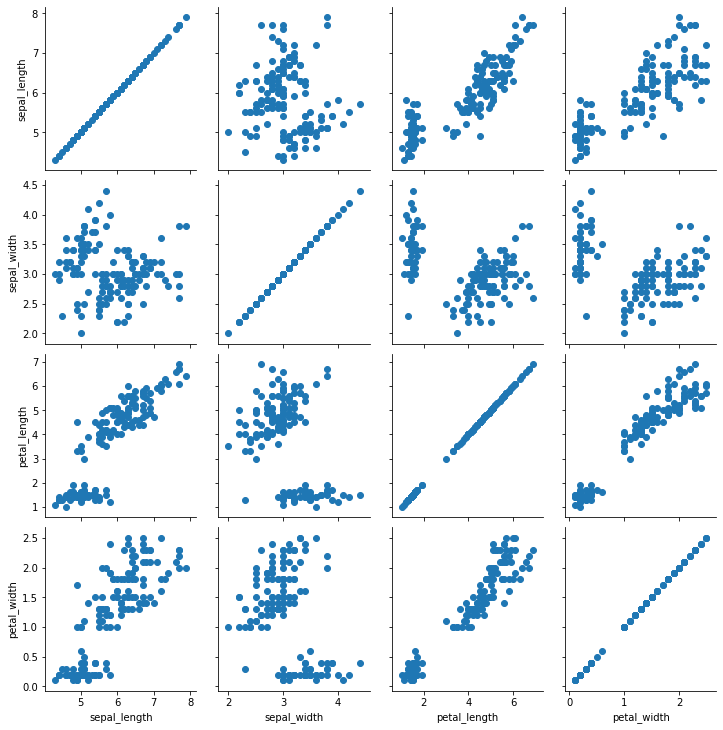

In [75]:
g= sns.PairGrid(iris)
g.map(plt.scatter)

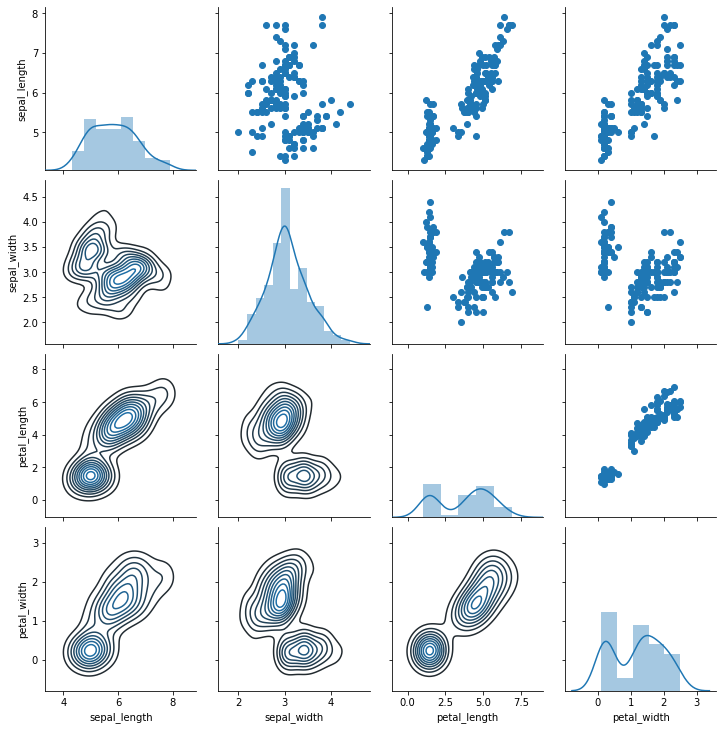

In [78]:
g= sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

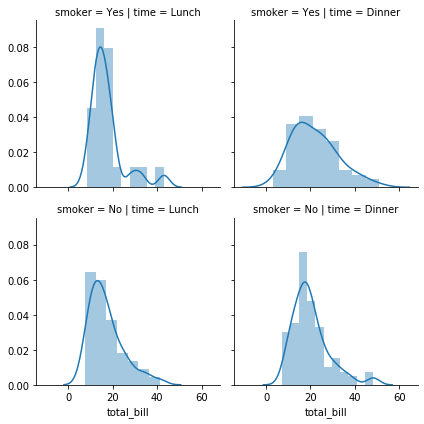

In [80]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')

g.map(sns.distplot, 'total_bill')

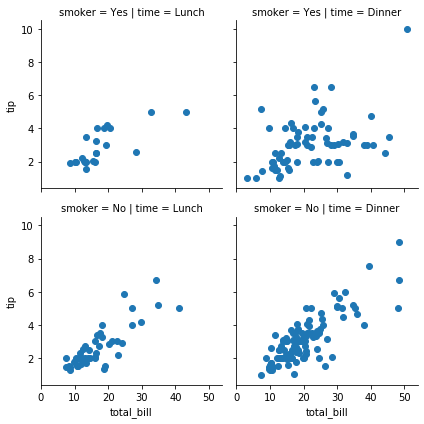

In [81]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')

g.map(plt.scatter, 'total_bill', 'tip')

# <strong>style and color</strong>